## Imports

In [1]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [2]:
import unlimtd_f
import time
from jax import random
import dataset_multi_infinite
import test
import plots
import ntk
import nll
from jax import numpy as np
import pickle
import models
import utils

## Option #1: training the network in this notebook

In [3]:
seed = 1655235988902897757
print(seed)

1655235988902897757


In [4]:
init_params, pre_state, pre_evals, post_state, pre_losses, post_losses, post_evals = unlimtd_f.unlimtd_f_multi_modal_mixture(seed=seed,
                                                                                     pre_n_epochs=30000,
                                                                                     pre_n_tasks=24,
                                                                                     pre_K=10,
                                                                                     post_n_epochs=30000,
                                                                                     post_n_tasks=24,
                                                                                     post_K=10,
                                                                                     data_noise=0.05, 
                                                                                     maddox_noise=0.05,
                                                                                     meta_lr=0.001,
                                                                                     subspace_dimension=10)

2022-08-27 13:43:49.281423: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib
2022-08-27 13:43:49.281991: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


This is UNLIMTD-F
For the multi-modal dataset: sine + line (both infinite)
This variant of UNLIMTD-F approaches the distribution with a mixture of GPs
Creating model
Creating optimizers
Starting first part of training (identity covariance)
Starting training with:
-n_epochs=30000
-n_tasks=24
-K=10
-data_noise=0.05
-maddox_noise=0.05
0  | 893.0116 (5.4402 s)
Eval: (DeviceArray(882.2309, dtype=float32), DeviceArray(2.448233, dtype=float32))
10  | 317.4789 (0.0156 s)
20  | 292.8121 (0.0139 s)
30  | 188.4886 (0.0168 s)
40  | 164.5755 (0.0213 s)
50  | 91.7973 (0.0186 s)
60  | 65.6677 (0.0220 s)
70  | 28.4761 (0.0225 s)
80  | 70.8053 (0.0198 s)
90  | 43.4758 (0.0171 s)
100  | 34.7697 (0.0181 s)
110  | 30.6383 (0.0172 s)
120  | 41.6060 (0.0227 s)
130  | 21.3166 (0.0117 s)
140  | 39.1074 (0.0107 s)
150  | 22.5972 (0.0120 s)
160  | 30.4676 (0.0181 s)
170  | 18.0368 (0.0180 s)
180  | 25.5317 (0.0224 s)
190  | 16.8071 (0.0237 s)
200  | 16.5410 (0.0170 s)
210  | 31.8148 (0.0210 s)
220  | 23.3882 (0

2830  | 4.5253 (0.0223 s)
2840  | 5.8031 (0.0138 s)
2850  | 4.4110 (0.0160 s)
2860  | 5.2801 (0.0201 s)
2870  | 7.0152 (0.0167 s)
2880  | 5.5612 (0.0181 s)
2890  | 6.1271 (0.0228 s)
2900  | 6.0883 (0.0184 s)
2910  | 6.0245 (0.0166 s)
2920  | 4.1534 (0.0212 s)
2930  | 4.5709 (0.0233 s)
2940  | 5.8212 (0.0213 s)
2950  | 4.6883 (0.0215 s)
2960  | 5.3803 (0.0144 s)
2970  | 6.4328 (0.0246 s)
2980  | 6.3683 (0.0201 s)
2990  | 6.0604 (0.0133 s)
3000  | 4.4239 (0.0155 s)
Eval: (DeviceArray(5.2749896, dtype=float32), DeviceArray(0.04681728, dtype=float32))
3010  | 6.4542 (0.0189 s)
3020  | 5.0837 (0.0204 s)
3030  | 5.2161 (0.0129 s)
3040  | 4.8204 (0.0146 s)
3050  | 4.4384 (0.0209 s)
3060  | 4.7897 (0.0194 s)
3070  | 5.4936 (0.0131 s)
3080  | 5.9135 (0.0211 s)
3090  | 6.5547 (0.0172 s)
3100  | 5.0487 (0.0192 s)
3110  | 6.1772 (0.0194 s)
3120  | 4.8408 (0.0192 s)
3130  | 5.5668 (0.0262 s)
3140  | 5.2340 (0.0237 s)
3150  | 6.7450 (0.0208 s)
3160  | 4.5461 (0.0183 s)
3170  | 4.9731 (0.0216 s)
3180

5790  | 4.5682 (0.0225 s)
5800  | 4.2180 (0.0213 s)
5810  | 5.6015 (0.0134 s)
5820  | 5.5960 (0.0205 s)
5830  | 5.4341 (0.0154 s)
5840  | 4.8525 (0.0136 s)
5850  | 5.5770 (0.0139 s)
5860  | 5.2646 (0.0105 s)
5870  | 4.1235 (0.0132 s)
5880  | 4.1592 (0.0106 s)
5890  | 3.5345 (0.0138 s)
5900  | 3.9711 (0.0126 s)
5910  | 4.7036 (0.0155 s)
5920  | 5.3517 (0.0098 s)
5930  | 4.2818 (0.0114 s)
5940  | 5.9752 (0.0150 s)
5950  | 3.6958 (0.0230 s)
5960  | 5.5839 (0.0184 s)
5970  | 4.2072 (0.0233 s)
5980  | 4.5069 (0.0192 s)
5990  | 4.6075 (0.0239 s)
6000  | 4.7322 (0.0185 s)
Eval: (DeviceArray(4.3922005, dtype=float32), DeviceArray(0.02227074, dtype=float32))
6010  | 4.2345 (0.0193 s)
6020  | 4.1013 (0.0249 s)
6030  | 6.7297 (0.0253 s)
6040  | 5.0685 (0.0168 s)
6050  | 4.2518 (0.0130 s)
6060  | 3.9312 (0.0152 s)
6070  | 3.5949 (0.0160 s)
6080  | 4.1086 (0.0247 s)
6090  | 4.6313 (0.0217 s)
6100  | 4.3642 (0.0134 s)
6110  | 4.2340 (0.0162 s)
6120  | 4.8273 (0.0225 s)
6130  | 3.5409 (0.0182 s)
6140

8750  | 3.2879 (0.0136 s)
8760  | 3.6366 (0.0210 s)
8770  | 3.4727 (0.0200 s)
8780  | 4.7301 (0.0187 s)
8790  | 3.3715 (0.0120 s)
8800  | 4.9581 (0.0156 s)
8810  | 3.7129 (0.0163 s)
8820  | 3.2486 (0.0187 s)
8830  | 3.1141 (0.0191 s)
8840  | 4.0283 (0.0211 s)
8850  | 3.7778 (0.0176 s)
8860  | 4.8846 (0.0191 s)
8870  | 4.3374 (0.0271 s)
8880  | 3.0359 (0.0295 s)
8890  | 3.8367 (0.0162 s)
8900  | 3.8482 (0.0174 s)
8910  | 5.5245 (0.0186 s)
8920  | 4.7752 (0.0204 s)
8930  | 4.2196 (0.0172 s)
8940  | 3.2555 (0.0141 s)
8950  | 3.2692 (0.0130 s)
8960  | 3.9370 (0.0135 s)
8970  | 3.9734 (0.0124 s)
8980  | 4.1734 (0.0207 s)
8990  | 3.0185 (0.0179 s)
9000  | 3.4282 (0.0179 s)
Eval: (DeviceArray(3.8163874, dtype=float32), DeviceArray(0.01616663, dtype=float32))
9010  | 3.0032 (0.0192 s)
9020  | 4.0988 (0.0225 s)
9030  | 4.8246 (0.0186 s)
9040  | 4.0643 (0.0180 s)
9050  | 4.3366 (0.0192 s)
9060  | 3.3483 (0.0190 s)
9070  | 3.6803 (0.0185 s)
9080  | 4.4882 (0.0209 s)
9090  | 5.6165 (0.0196 s)
9100

11660  | 4.3181 (0.0155 s)
11670  | 3.3934 (0.0240 s)
11680  | 2.9256 (0.0160 s)
11690  | 3.6566 (0.0133 s)
11700  | 2.8402 (0.0155 s)
11710  | 2.3304 (0.0205 s)
11720  | 3.9324 (0.0195 s)
11730  | 4.4999 (0.0136 s)
11740  | 4.6118 (0.0130 s)
11750  | 4.6633 (0.0152 s)
11760  | 2.8940 (0.0207 s)
11770  | 2.9630 (0.0184 s)
11780  | 3.5903 (0.0129 s)
11790  | 3.0878 (0.0130 s)
11800  | 2.1415 (0.0171 s)
11810  | 3.6714 (0.0194 s)
11820  | 3.0765 (0.0178 s)
11830  | 3.4837 (0.0133 s)
11840  | 2.4794 (0.0120 s)
11850  | 2.4356 (0.0154 s)
11860  | 3.7848 (0.0167 s)
11870  | 3.7349 (0.0146 s)
11880  | 4.0107 (0.0134 s)
11890  | 2.6437 (0.0183 s)
11900  | 3.8733 (0.0190 s)
11910  | 4.0415 (0.0194 s)
11920  | 3.6747 (0.0120 s)
11930  | 3.0435 (0.0123 s)
11940  | 3.0920 (0.0118 s)
11950  | 2.9567 (0.0121 s)
11960  | 3.4664 (0.0112 s)
11970  | 2.5487 (0.0102 s)
11980  | 3.4159 (0.0099 s)
11990  | 3.3408 (0.0120 s)
12000  | 3.9655 (0.0096 s)
Eval: (DeviceArray(3.1379714, dtype=float32), DeviceArr

14520  | 3.0836 (0.0214 s)
14530  | 2.1573 (0.0182 s)
14540  | 2.7984 (0.0163 s)
14550  | 1.8582 (0.0176 s)
14560  | 2.7656 (0.0175 s)
14570  | 3.0918 (0.0160 s)
14580  | 2.3173 (0.0127 s)
14590  | 3.7917 (0.0125 s)
14600  | 1.3642 (0.0161 s)
14610  | 2.4037 (0.0139 s)
14620  | 1.9787 (0.0147 s)
14630  | 1.3333 (0.0145 s)
14640  | 1.6177 (0.0188 s)
14650  | 2.4761 (0.0183 s)
14660  | 1.1534 (0.0165 s)
14670  | 2.2284 (0.0141 s)
14680  | 2.9254 (0.0173 s)
14690  | 1.9834 (0.0274 s)
14700  | 1.7035 (0.0129 s)
14710  | 2.9771 (0.0138 s)
14720  | 1.7236 (0.0206 s)
14730  | 1.8778 (0.0199 s)
14740  | 1.6724 (0.0235 s)
14750  | 0.6667 (0.0129 s)
14760  | 1.3058 (0.0136 s)
14770  | 1.8175 (0.0135 s)
14780  | 2.9961 (0.0133 s)
14790  | 2.5209 (0.0135 s)
14800  | 2.1214 (0.0140 s)
14810  | 1.5494 (0.0141 s)
14820  | 1.9382 (0.0131 s)
14830  | 2.7424 (0.0163 s)
14840  | 2.2854 (0.0207 s)
14850  | 0.8007 (0.0207 s)
14860  | 1.5336 (0.0231 s)
14870  | 1.5474 (0.0183 s)
14880  | 1.4884 (0.0212 s)
1

17400  | 1.8327 (0.0133 s)
17410  | 2.7110 (0.0137 s)
17420  | 1.9668 (0.0132 s)
17430  | 2.2413 (0.0148 s)
17440  | 3.2068 (0.0158 s)
17450  | 1.2098 (0.0165 s)
17460  | 1.9138 (0.0213 s)
17470  | 1.7130 (0.0201 s)
17480  | 1.8927 (0.0174 s)
17490  | 1.6646 (0.0212 s)
17500  | 0.6033 (0.0161 s)
Eval: (DeviceArray(1.9894869, dtype=float32), DeviceArray(0.00429574, dtype=float32))
17510  | 1.2161 (0.0131 s)
17520  | 1.0705 (0.0181 s)
17530  | 2.6240 (0.0185 s)
17540  | 2.3629 (0.0181 s)
17550  | 2.1189 (0.0175 s)
17560  | 1.9963 (0.0185 s)
17570  | 1.4725 (0.0154 s)
17580  | 3.6145 (0.0134 s)
17590  | 2.8541 (0.0134 s)
17600  | 2.2519 (0.0135 s)
17610  | 3.6747 (0.0123 s)
17620  | 3.3373 (0.0156 s)
17630  | 1.5567 (0.0135 s)
17640  | 1.4906 (0.0160 s)
17650  | 2.7488 (0.0157 s)
17660  | 1.8251 (0.0159 s)
17670  | 3.4882 (0.0185 s)
17680  | 1.2208 (0.0132 s)
17690  | 1.7597 (0.0125 s)
17700  | 3.7875 (0.0142 s)
17710  | -0.0890 (0.0138 s)
17720  | 2.2831 (0.0134 s)
17730  | 2.5594 (0.014

20260  | 0.8656 (0.0198 s)
20270  | 2.2099 (0.0154 s)
20280  | 1.4848 (0.0119 s)
20290  | 1.7843 (0.0122 s)
20300  | 1.6130 (0.0111 s)
20310  | 2.4436 (0.0155 s)
20320  | 1.5403 (0.0107 s)
20330  | 2.2177 (0.0112 s)
20340  | 0.5797 (0.0150 s)
20350  | 2.0502 (0.0115 s)
20360  | 1.8580 (0.0115 s)
20370  | 1.8919 (0.0105 s)
20380  | 2.9852 (0.0114 s)
20390  | 2.2120 (0.0192 s)
20400  | 3.0563 (0.0200 s)
20410  | 2.4834 (0.0249 s)
20420  | 2.4507 (0.0165 s)
20430  | 2.6860 (0.0228 s)
20440  | 1.8965 (0.0199 s)
20450  | 1.5308 (0.0164 s)
20460  | 0.9227 (0.0326 s)
20470  | 3.1499 (0.0205 s)
20480  | 1.6874 (0.0220 s)
20490  | 2.1571 (0.0185 s)
20500  | 2.0198 (0.0116 s)
Eval: (DeviceArray(1.8915251, dtype=float32), DeviceArray(0.00409397, dtype=float32))
20510  | 1.0864 (0.0182 s)
20520  | 1.5559 (0.0162 s)
20530  | 1.5892 (0.0198 s)
20540  | 1.1099 (0.0189 s)
20550  | 2.3873 (0.0200 s)
20560  | 2.2338 (0.0179 s)
20570  | 2.3453 (0.0230 s)
20580  | 2.1521 (0.0136 s)
20590  | 1.0339 (0.0189

23120  | 1.1790 (0.0195 s)
23130  | 1.4623 (0.0215 s)
23140  | 1.9177 (0.0198 s)
23150  | 2.6925 (0.0159 s)
23160  | 1.7742 (0.0228 s)
23170  | 1.9171 (0.0124 s)
23180  | 1.1956 (0.0202 s)
23190  | 2.0466 (0.0139 s)
23200  | 1.1197 (0.0186 s)
23210  | 2.8209 (0.0192 s)
23220  | 2.9024 (0.0235 s)
23230  | 2.0781 (0.0150 s)
23240  | 1.9896 (0.0182 s)
23250  | 2.1492 (0.0200 s)
23260  | 1.5298 (0.0192 s)
23270  | 1.3385 (0.0247 s)
23280  | 0.3840 (0.0142 s)
23290  | 2.1266 (0.0245 s)
23300  | 0.6753 (0.0219 s)
23310  | 1.4886 (0.0197 s)
23320  | 1.5578 (0.0216 s)
23330  | 2.3182 (0.0222 s)
23340  | 2.0640 (0.0142 s)
23350  | 2.0127 (0.0235 s)
23360  | 1.6527 (0.0236 s)
23370  | 1.2225 (0.0193 s)
23380  | 2.0609 (0.0142 s)
23390  | 1.8757 (0.0239 s)
23400  | 2.7876 (0.0148 s)
23410  | 1.0626 (0.0226 s)
23420  | 1.3603 (0.0135 s)
23430  | 1.1472 (0.0236 s)
23440  | 2.0161 (0.0210 s)
23450  | 1.9736 (0.0140 s)
23460  | 2.2915 (0.0143 s)
23470  | 1.7987 (0.0139 s)
23480  | 1.3561 (0.0144 s)
2

26000  | 3.3373 (0.0247 s)
Eval: (DeviceArray(1.417316, dtype=float32), DeviceArray(0.00313683, dtype=float32))
26010  | 0.7243 (0.0140 s)
26020  | 2.3392 (0.0133 s)
26030  | 2.0593 (0.0144 s)
26040  | 1.7323 (0.0261 s)
26050  | 1.3187 (0.0188 s)
26060  | 1.5469 (0.0297 s)
26070  | 0.7319 (0.0218 s)
26080  | 0.4479 (0.0240 s)
26090  | 1.1943 (0.0245 s)
26100  | 3.3982 (0.0228 s)
26110  | 2.5028 (0.0136 s)
26120  | 0.7378 (0.0138 s)
26130  | 1.3418 (0.0139 s)
26140  | 1.8187 (0.0140 s)
26150  | 1.5612 (0.0172 s)
26160  | 0.8385 (0.0168 s)
26170  | 1.9716 (0.0174 s)
26180  | 2.0478 (0.0127 s)
26190  | 1.0543 (0.0122 s)
26200  | 1.5138 (0.0153 s)
26210  | 0.2233 (0.0154 s)
26220  | 0.7257 (0.0127 s)
26230  | 1.4344 (0.0132 s)
26240  | 1.4286 (0.0136 s)
26250  | 1.5129 (0.0128 s)
26260  | 0.6779 (0.0177 s)
26270  | 1.9268 (0.0133 s)
26280  | 1.4048 (0.0227 s)
26290  | 1.6307 (0.0198 s)
26300  | 0.3420 (0.0166 s)
26310  | 1.5121 (0.0172 s)
26320  | 1.7082 (0.0193 s)
26330  | 1.0627 (0.0176 

28860  | 2.0790 (0.0206 s)
28870  | 0.7081 (0.0172 s)
28880  | 0.9316 (0.0130 s)
28890  | 1.7776 (0.0212 s)
28900  | 1.4181 (0.0278 s)
28910  | 1.8266 (0.0247 s)
28920  | 2.0273 (0.0202 s)
28930  | 0.9050 (0.0132 s)
28940  | 1.4580 (0.0130 s)
28950  | 2.7775 (0.0142 s)
28960  | 2.1298 (0.0156 s)
28970  | 2.3744 (0.0135 s)
28980  | 2.1277 (0.0231 s)
28990  | 0.8027 (0.0260 s)
29000  | 2.6149 (0.0209 s)
Eval: (DeviceArray(1.6999207, dtype=float32), DeviceArray(0.00355405, dtype=float32))
29010  | 1.6525 (0.0180 s)
29020  | 2.5137 (0.0201 s)
29030  | 1.3125 (0.0197 s)
29040  | 2.0545 (0.0189 s)
29050  | 1.4278 (0.0184 s)
29060  | 1.9151 (0.0170 s)
29070  | 1.8499 (0.0142 s)
29080  | 0.0302 (0.0142 s)
29090  | 2.5445 (0.0181 s)
29100  | 2.2629 (0.0189 s)
29110  | 2.9598 (0.0205 s)
29120  | 1.2181 (0.0167 s)
29130  | 1.3463 (0.0206 s)
29140  | 1.3451 (0.0126 s)
29150  | 1.5735 (0.0128 s)
29160  | 1.7385 (0.0160 s)
29170  | 1.8124 (0.0140 s)
29180  | 2.4907 (0.0252 s)
29190  | 1.9603 (0.0144

1670  | -5.0474 (0.0183 s)
1680  | -4.8318 (0.0193 s)
1690  | -5.2204 (0.0205 s)
1700  | -6.1022 (0.0197 s)
1710  | -5.6552 (0.0187 s)
1720  | -5.7188 (0.0204 s)
1730  | -5.3526 (0.0213 s)
1740  | -4.5603 (0.0215 s)
1750  | -5.8285 (0.0215 s)
1760  | -5.4439 (0.0209 s)
1770  | -5.2457 (0.0249 s)
1780  | -5.6653 (0.0249 s)
1790  | -5.6164 (0.0249 s)
1800  | -5.7123 (0.0259 s)
1810  | -5.5219 (0.0250 s)
1820  | -4.7221 (0.0248 s)
1830  | -5.0442 (0.0189 s)
1840  | -5.2035 (0.0184 s)
1850  | -5.1467 (0.0187 s)
1860  | -5.6362 (0.0205 s)
1870  | -5.6153 (0.0203 s)
1880  | -6.0627 (0.0198 s)
1890  | -4.4091 (0.0248 s)
1900  | -5.9483 (0.0255 s)
1910  | -5.0043 (0.0242 s)
1920  | -5.7281 (0.0264 s)
1930  | -5.6116 (0.0229 s)
1940  | -5.9459 (0.0203 s)
1950  | -5.5369 (0.0184 s)
1960  | -6.0796 (0.0187 s)
1970  | -4.8339 (0.0223 s)
1980  | -5.7746 (0.0272 s)
1990  | -5.4221 (0.0241 s)
2000  | -6.5011 (0.0226 s)
Eval: (DeviceArray(-5.5821095, dtype=float32), DeviceArray(0.00150831, dtype=float

4520  | -6.6433 (0.0219 s)
4530  | -5.9279 (0.0205 s)
4540  | -5.5746 (0.0282 s)
4550  | -5.5009 (0.0194 s)
4560  | -6.1161 (0.0191 s)
4570  | -6.3905 (0.0193 s)
4580  | -5.9529 (0.0238 s)
4590  | -5.9039 (0.0206 s)
4600  | -6.4260 (0.0195 s)
4610  | -6.6241 (0.0195 s)
4620  | -5.9386 (0.0206 s)
4630  | -4.9316 (0.0241 s)
4640  | -6.4832 (0.0214 s)
4650  | -6.5146 (0.0212 s)
4660  | -6.5999 (0.0206 s)
4670  | -6.2779 (0.0230 s)
4680  | -5.5901 (0.0196 s)
4690  | -5.8487 (0.0215 s)
4700  | -5.5522 (0.0245 s)
4710  | -5.8456 (0.0204 s)
4720  | -5.6088 (0.0202 s)
4730  | -6.3000 (0.0205 s)
4740  | -6.1137 (0.0251 s)
4750  | -5.8241 (0.0264 s)
4760  | -6.7256 (0.0199 s)
4770  | -6.2185 (0.0222 s)
4780  | -5.9422 (0.0209 s)
4790  | -5.3417 (0.0212 s)
4800  | -6.2793 (0.0239 s)
4810  | -6.4807 (0.0239 s)
4820  | -5.9110 (0.0198 s)
4830  | -5.4749 (0.0189 s)
4840  | -5.9423 (0.0205 s)
4850  | -5.5290 (0.0252 s)
4860  | -5.4990 (0.0202 s)
4870  | -5.1629 (0.0299 s)
4880  | -5.6401 (0.0262 s)
4

7400  | -6.5718 (0.0237 s)
7410  | -6.4036 (0.0249 s)
7420  | -6.1565 (0.0228 s)
7430  | -6.0292 (0.0279 s)
7440  | -6.2624 (0.0197 s)
7450  | -6.0596 (0.0238 s)
7460  | -7.0660 (0.0237 s)
7470  | -7.2555 (0.0237 s)
7480  | -6.6719 (0.0222 s)
7490  | -6.1975 (0.0292 s)
7500  | -6.9337 (0.0208 s)
Eval: (DeviceArray(-6.304557, dtype=float32), DeviceArray(0.00135417, dtype=float32))
7510  | -6.5544 (0.0252 s)
7520  | -6.4010 (0.0190 s)
7530  | -6.9982 (0.0211 s)
7540  | -7.2425 (0.0226 s)
7550  | -6.0677 (0.0240 s)
7560  | -5.4693 (0.0278 s)
7570  | -5.8518 (0.0213 s)
7580  | -5.2044 (0.0200 s)
7590  | -4.9195 (0.0188 s)
7600  | -6.4949 (0.0246 s)
7610  | -6.6420 (0.0253 s)
7620  | -5.8979 (0.0238 s)
7630  | -6.2919 (0.0255 s)
7640  | -6.3946 (0.0204 s)
7650  | -6.7796 (0.0243 s)
7660  | -6.2097 (0.0249 s)
7670  | -6.3533 (0.0241 s)
7680  | -5.9897 (0.0199 s)
7690  | -6.8637 (0.0202 s)
7700  | -6.8596 (0.0256 s)
7710  | -7.0666 (0.0199 s)
7720  | -6.6623 (0.0284 s)
7730  | -4.1137 (0.0259

10240  | -5.6334 (0.0310 s)
10250  | -7.2150 (0.0252 s)
10260  | -7.1627 (0.0226 s)
10270  | -6.7108 (0.0256 s)
10280  | -4.6257 (0.0339 s)
10290  | -6.2930 (0.0249 s)
10300  | -5.9378 (0.0285 s)
10310  | -6.9937 (0.0311 s)
10320  | -6.2052 (0.0285 s)
10330  | -7.1528 (0.0287 s)
10340  | -6.4218 (0.0285 s)
10350  | -7.3680 (0.0304 s)
10360  | -7.2707 (0.0309 s)
10370  | -7.5010 (0.0280 s)
10380  | -7.1666 (0.0203 s)
10390  | -7.2953 (0.0305 s)
10400  | -7.8316 (0.0206 s)
10410  | -6.8233 (0.0203 s)
10420  | -6.4668 (0.0170 s)
10430  | -7.0492 (0.0204 s)
10440  | -6.9372 (0.0179 s)
10450  | -6.8573 (0.0167 s)
10460  | -6.8156 (0.0202 s)
10470  | -7.6059 (0.0204 s)
10480  | -7.8942 (0.0309 s)
10490  | -7.3825 (0.0361 s)
10500  | -6.6996 (0.0354 s)
Eval: (DeviceArray(-7.0302143, dtype=float32), DeviceArray(0.00134021, dtype=float32))
10510  | -6.2276 (0.0340 s)
10520  | -7.2142 (0.0254 s)
10530  | -7.4159 (0.0203 s)
10540  | -7.1757 (0.0240 s)
10550  | -6.6238 (0.0241 s)
10560  | -6.1349 

13010  | -8.7895 (0.0276 s)
13020  | -7.9806 (0.0255 s)
13030  | -7.9201 (0.0231 s)
13040  | -7.1469 (0.0289 s)
13050  | -7.8304 (0.0300 s)
13060  | -6.4199 (0.0226 s)
13070  | -6.7833 (0.0297 s)
13080  | -7.6613 (0.0213 s)
13090  | -8.3155 (0.0242 s)
13100  | -7.5759 (0.0259 s)
13110  | -7.3450 (0.0195 s)
13120  | -7.6746 (0.0239 s)
13130  | -5.9924 (0.0261 s)
13140  | -6.3415 (0.0182 s)
13150  | -6.7825 (0.0245 s)
13160  | -6.6380 (0.0211 s)
13170  | -7.4112 (0.0279 s)
13180  | -7.3223 (0.0260 s)
13190  | -7.5608 (0.0165 s)
13200  | -7.6686 (0.0303 s)
13210  | -7.8683 (0.0188 s)
13220  | -7.1705 (0.0225 s)
13230  | -6.0552 (0.0202 s)
13240  | -6.7323 (0.0259 s)
13250  | -7.8030 (0.0250 s)
13260  | -7.8693 (0.0248 s)
13270  | -8.1261 (0.0380 s)
13280  | -7.2877 (0.0313 s)
13290  | -7.8011 (0.0267 s)
13300  | -8.0193 (0.0313 s)
13310  | -8.7657 (0.0267 s)
13320  | -8.4147 (0.0195 s)
13330  | -7.4562 (0.0206 s)
13340  | -7.9731 (0.0189 s)
13350  | -7.7992 (0.0295 s)
13360  | -7.2001 (0.

15790  | -8.0503 (0.0308 s)
15800  | -7.7680 (0.0253 s)
15810  | -7.2884 (0.0240 s)
15820  | -7.8456 (0.0285 s)
15830  | -7.7939 (0.0250 s)
15840  | -6.9878 (0.0171 s)
15850  | -8.3923 (0.0239 s)
15860  | -8.1301 (0.0306 s)
15870  | -7.8534 (0.0259 s)
15880  | -6.8524 (0.0176 s)
15890  | -7.6935 (0.0274 s)
15900  | -8.3421 (0.0289 s)
15910  | -8.3212 (0.0275 s)
15920  | -6.1384 (0.0289 s)
15930  | -7.4817 (0.0200 s)
15940  | -7.0016 (0.0230 s)
15950  | -7.9502 (0.0252 s)
15960  | -8.4707 (0.0217 s)
15970  | -7.7545 (0.0240 s)
15980  | -7.4958 (0.0238 s)
15990  | -6.9732 (0.0205 s)
16000  | -8.3567 (0.0269 s)
Eval: (DeviceArray(-7.4724727, dtype=float32), DeviceArray(0.00120289, dtype=float32))
16010  | -8.2124 (0.0351 s)
16020  | -6.9808 (0.0370 s)
16030  | -7.2711 (0.0229 s)
16040  | -8.2410 (0.0281 s)
16050  | -7.5215 (0.0295 s)
16060  | -8.1186 (0.0298 s)
16070  | -7.8284 (0.0320 s)
16080  | -8.2680 (0.0235 s)
16090  | -8.6487 (0.0292 s)
16100  | -7.1693 (0.0308 s)
16110  | -7.5718 

18540  | -7.6667 (0.0247 s)
18550  | -6.9241 (0.0175 s)
18560  | -6.5997 (0.0211 s)
18570  | -7.0820 (0.0241 s)
18580  | -8.4809 (0.0314 s)
18590  | -7.6269 (0.0261 s)
18600  | -7.3121 (0.0174 s)
18610  | -8.2492 (0.0241 s)
18620  | -7.4267 (0.0202 s)
18630  | -7.8832 (0.0292 s)
18640  | -7.0262 (0.0242 s)
18650  | -8.1090 (0.0226 s)
18660  | -7.9799 (0.0233 s)
18670  | -7.8842 (0.0265 s)
18680  | -8.1272 (0.0188 s)
18690  | -8.5244 (0.0383 s)
18700  | -6.9177 (0.0403 s)
18710  | -7.9965 (0.0294 s)
18720  | -7.2153 (0.0186 s)
18730  | -7.9918 (0.0241 s)
18740  | -8.2237 (0.0226 s)
18750  | -7.0765 (0.0214 s)
18760  | -6.6236 (0.0282 s)
18770  | -8.1071 (0.0164 s)
18780  | -6.9415 (0.0191 s)
18790  | -7.3853 (0.0274 s)
18800  | -7.1223 (0.0212 s)
18810  | -7.9381 (0.0197 s)
18820  | -7.7851 (0.0226 s)
18830  | -7.6743 (0.0270 s)
18840  | -7.8724 (0.0314 s)
18850  | -7.9059 (0.0188 s)
18860  | -7.1912 (0.0204 s)
18870  | -6.8853 (0.0179 s)
18880  | -8.1869 (0.0265 s)
18890  | -7.5304 (0.

21330  | -7.3015 (0.0162 s)
21340  | -7.4809 (0.0149 s)
21350  | -7.0482 (0.0188 s)
21360  | -7.9338 (0.0230 s)
21370  | -8.2460 (0.0137 s)
21380  | -8.1369 (0.0145 s)
21390  | -6.7993 (0.0192 s)
21400  | -8.0560 (0.0267 s)
21410  | -7.9887 (0.0234 s)
21420  | -7.2559 (0.0264 s)
21430  | -6.9665 (0.0331 s)
21440  | -8.1207 (0.0309 s)
21450  | -8.5083 (0.0235 s)
21460  | -8.1430 (0.0247 s)
21470  | -7.3853 (0.0226 s)
21480  | -8.2058 (0.0166 s)
21490  | -7.6135 (0.0193 s)
21500  | -5.8835 (0.0239 s)
Eval: (DeviceArray(-7.1842875, dtype=float32), DeviceArray(0.00128166, dtype=float32))
21510  | -8.0200 (0.0290 s)
21520  | -6.7710 (0.0185 s)
21530  | -7.6038 (0.0251 s)
21540  | -7.6361 (0.0285 s)
21550  | -7.3205 (0.0174 s)
21560  | -8.6343 (0.0184 s)
21570  | -8.0051 (0.0241 s)
21580  | -8.1946 (0.0253 s)
21590  | -8.3088 (0.0193 s)
21600  | -7.4728 (0.0245 s)
21610  | -8.3045 (0.0208 s)
21620  | -7.5733 (0.0256 s)
21630  | -7.3122 (0.0221 s)
21640  | -7.4003 (0.0243 s)
21650  | -7.2674 

24080  | -8.6091 (0.0227 s)
24090  | -7.4220 (0.0212 s)
24100  | -7.6356 (0.0267 s)
24110  | -8.3851 (0.0332 s)
24120  | -8.2815 (0.0184 s)
24130  | -7.9077 (0.0297 s)
24140  | -6.7372 (0.0251 s)
24150  | -7.4365 (0.0221 s)
24160  | -7.9488 (0.0210 s)
24170  | -7.4253 (0.0313 s)
24180  | -5.5878 (0.0228 s)
24190  | -6.7199 (0.0221 s)
24200  | -7.4646 (0.0237 s)
24210  | -7.6346 (0.0246 s)
24220  | -7.0747 (0.0301 s)
24230  | -7.6206 (0.0227 s)
24240  | -8.1247 (0.0220 s)
24250  | -8.2530 (0.0321 s)
24260  | -7.1632 (0.0290 s)
24270  | -8.1261 (0.0224 s)
24280  | -7.1859 (0.0248 s)
24290  | -7.6902 (0.0223 s)
24300  | -7.8141 (0.0299 s)
24310  | -8.0825 (0.0239 s)
24320  | -7.6601 (0.0365 s)
24330  | -8.0203 (0.0262 s)
24340  | -6.5322 (0.0320 s)
24350  | -7.8752 (0.0193 s)
24360  | -8.1237 (0.0283 s)
24370  | -6.4110 (0.0241 s)
24380  | -8.0764 (0.0226 s)
24390  | -7.9373 (0.0180 s)
24400  | -7.7524 (0.0253 s)
24410  | -7.6577 (0.0278 s)
24420  | -8.4255 (0.0223 s)
24430  | -8.1160 (0.

26860  | -8.0685 (0.0292 s)
26870  | -8.4624 (0.0266 s)
26880  | -7.9689 (0.0355 s)
26890  | -8.0500 (0.0234 s)
26900  | -7.3946 (0.0228 s)
26910  | -7.5281 (0.0229 s)
26920  | -8.3089 (0.0175 s)
26930  | -7.0025 (0.0180 s)
26940  | -7.9123 (0.0250 s)
26950  | -7.2464 (0.0344 s)
26960  | -7.3946 (0.0227 s)
26970  | -7.3416 (0.0226 s)
26980  | -7.0181 (0.0289 s)
26990  | -7.5736 (0.0301 s)
27000  | -8.0470 (0.0275 s)
Eval: (DeviceArray(-7.779757, dtype=float32), DeviceArray(0.0009792, dtype=float32))
27010  | -8.3888 (0.0333 s)
27020  | -7.2811 (0.0267 s)
27030  | -8.2860 (0.0290 s)
27040  | -8.2126 (0.0263 s)
27050  | -7.8046 (0.0260 s)
27060  | -7.7256 (0.0281 s)
27070  | -7.2086 (0.0215 s)
27080  | -6.6087 (0.0288 s)
27090  | -8.3649 (0.0271 s)
27100  | -7.4466 (0.0299 s)
27110  | -7.9004 (0.0212 s)
27120  | -7.5360 (0.0363 s)
27130  | -8.3531 (0.0335 s)
27140  | -6.9508 (0.0294 s)
27150  | -7.3390 (0.0181 s)
27160  | -8.0162 (0.0261 s)
27170  | -8.1967 (0.0270 s)
27180  | -7.3930 (0

29610  | -7.6750 (0.0194 s)
29620  | -7.6812 (0.0192 s)
29630  | -8.0442 (0.0287 s)
29640  | -7.7813 (0.0252 s)
29650  | -6.6225 (0.0249 s)
29660  | -7.6929 (0.0334 s)
29670  | -8.0301 (0.0220 s)
29680  | -9.0165 (0.0282 s)
29690  | -7.6969 (0.0259 s)
29700  | -8.3189 (0.0265 s)
29710  | -8.1662 (0.0285 s)
29720  | -8.5025 (0.0264 s)
29730  | -7.5487 (0.0220 s)
29740  | -7.1268 (0.0255 s)
29750  | -7.9252 (0.0177 s)
29760  | -7.1385 (0.0271 s)
29770  | -7.3500 (0.0311 s)
29780  | -6.9291 (0.0293 s)
29790  | -8.1662 (0.0285 s)
29800  | -7.6911 (0.0240 s)
29810  | -7.1484 (0.0265 s)
29820  | -8.0524 (0.0249 s)
29830  | -8.4143 (0.0221 s)
29840  | -7.0425 (0.0259 s)
29850  | -6.5138 (0.0262 s)
29860  | -7.5587 (0.0315 s)
29870  | -7.3744 (0.0278 s)
29880  | -8.0781 (0.0312 s)
29890  | -8.3628 (0.0315 s)
29900  | -7.7576 (0.0231 s)
29910  | -7.2373 (0.0296 s)
29920  | -7.3409 (0.0311 s)
29930  | -7.7423 (0.0313 s)
29940  | -7.7120 (0.0409 s)
29950  | -8.3586 (0.0338 s)
29960  | -8.3764 (0.

In [5]:
output = {}
output["seed"] = seed
output["pre_n_epochs"]=30000
output["pre_n_tasks"]=24
output["pre_K"]=10
output["post_n_epochs"]=30000
output["post_n_tasks"]=24
output["post_K"]=10
output["data_noise"]=0.05
output["maddox_noise"]=0.05
output["meta_lr"]=0.001
output["subspace_dimension"]=10
output["pre_losses"]=pre_losses
output["post_losses"]=post_losses
output["init_params"]=init_params
output["intermediate_params"]=pre_state.params
output["trained_params"]=post_state.params
output["intermediate_batch_stats"]=pre_state.batch_stats
output["trained_batch_stats"]=post_state.batch_stats
output["trained_scale1"]=post_state.scale1
output["trained_scale2"]=post_state.scale2
output["proj1"]=post_state.proj1
output["proj2"]=post_state.proj2
output["trained_mean1"]=post_state.mean1
output["trained_mean2"]=post_state.mean2
output["intermediate_mean"]=pre_state.mean
output["pre_evals"]=pre_evals
output["post_evals"]=post_evals

In [16]:
with open("logs_final/multi_mixture_fim.pickle", "wb") as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Option #2: loading a previously trained network

In [3]:
with open("logs_final/multi_mixture_fim.pickle", "rb") as handle:
    output = pickle.load(handle)

## Testing the trained network

In [6]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

In [7]:
kernel1, kernel_self1, jac = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output["trained_params"], output["trained_scale1"], output["trained_batch_stats"], output["proj1"])
kernel2, kernel_self2, jac = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output["trained_params"], output["trained_scale2"], output["trained_batch_stats"], output["proj2"])

In [8]:
key = random.PRNGKey(0)

Most probable kernel is 2


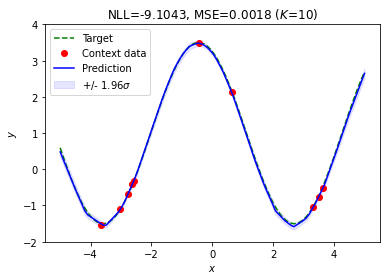

In [9]:
key, subkey = random.split(key)
plots.plot_notebooks_two_kernels(key, kernel1, kernel_self1, kernel2, kernel_self2, jac, output["trained_mean1"], output["trained_mean2"], K=10, task_type="sine")

Most probable kernel is 1


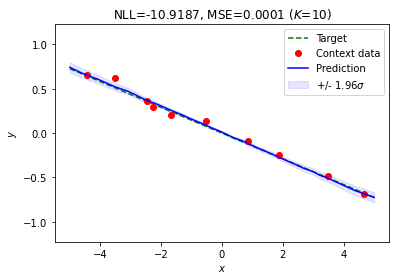

In [10]:
key, subkey = random.split(key)
plots.plot_notebooks_two_kernels(key, kernel1, kernel_self1, kernel2, kernel_self2, jac, output["trained_mean1"], output["trained_mean2"], K=10, task_type="line")